In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

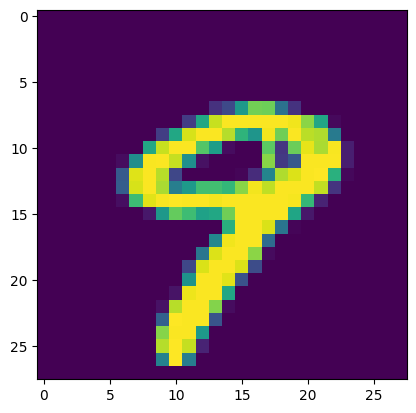

In [12]:
(Xtrain,ytrain),(Xtest,ytest)=keras.datasets.mnist.load_data()

plt.imshow(Xtest[9])
plt.show()

In [13]:
Xtrain = Xtrain/255
Xtest = Xtest/255

md=Sequential()

md.add(Flatten(input_shape=(28,28)))
md.add(Dense(100,activation='relu'))
md.add(Dense(10,activation='softmax'))
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
md.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',)

In [15]:
md.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2684
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1215
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0854
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198


In [16]:
yprob=md.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [17]:
ypred = yprob.argmax(axis=1)
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Accuracy Score: 0.9753


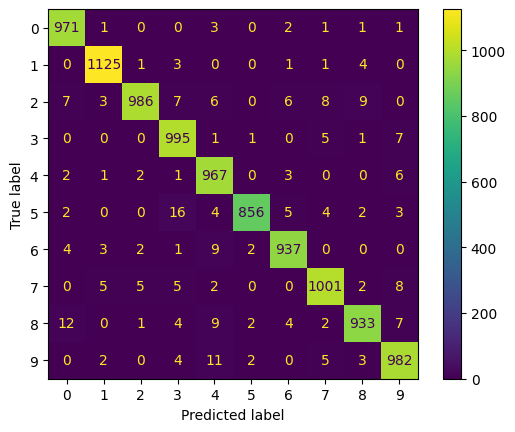

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
acc=accuracy_score(ytest,ypred)
print("Accuracy Score:",acc)
cm=confusion_matrix(ytest,ypred)
cd=ConfusionMatrixDisplay(confusion_matrix=cm)
cd.plot()